In [13]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import csv

import fastText
import spacy 
import tensorflow as tf
import tensorflow_hub as hub

# Prepare Data

In [ ]:
# need to find proper datasets

In [1]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.6.6'

In [2]:
import scrapy
from scrapy.crawler import CrawlerProcess

# Web Crawling

## Setup a pipeline

In [6]:
import json
class JsonWriterPipeline(object):
    def open_spider(self, spider):
        self.file = open('crawling_results.jl', 'w')
    def close_spider(self, spider):
        self.file.close()
    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

## Define the spider

In [7]:
import logging
from scrapy.selector import Selector
from urllib.parse import urljoin

class DeathNoteSpider(scrapy.Spider):
    name = "DeathNote"
    start_urls = [
        'http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'crawling_results.json'                   # Used for pipeline 2
    }

    def parse(self, response):
        print('A response from %s just arrived!', response.url)
        sel = Selector(response)
#         print(sel.xpath('//table[@class="tdcj_table indent"]/tr'))

        table = sel.xpath('//table[@class="tdcj_table indent"]/tr')
        for tr in table:
            url_info = urljoin(response.url, str(tr.xpath('td[2]/a/@href').extract_first()))
            url_stmt = urljoin(response.url, str(tr.xpath('td[3]/a/@href').extract_first()))
            print(url_stmt)
        
            yield {
                'first_name': tr.xpath('td[5]/text()').extract_first(),
                'last_name': tr.xpath('td[4]/text()').extract_first(),
                'age': tr.xpath('td[7]/text()').extract_first(),
                'date': tr.xpath('td[8]/text()').extract_first(),
                'race': tr.xpath('td[9]/text()').extract_first(),
                'country': tr.xpath('td[10]/text()').extract_first(),
                'info_link': url_info,
                'death_note_link': url_stmt
            }
        

## Start the crawler

In [8]:
process = CrawlerProcess()
process.crawl(DeathNoteSpider)
process.start()

2018-11-17 17:30:40 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2018-11-17 17:30:40 [scrapy.utils.log] INFO: Versions: lxml 4.2.5.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.1, w3lib 1.19.0, Twisted 17.5.0, Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) - [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2p  14 Aug 2018), cryptography 2.3.1, Platform Darwin-17.7.0-x86_64-i386-64bit
2018-11-17 17:30:40 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'crawling_results.json', 'LOG_LEVEL': 30}


A response from %s just arrived! http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html
http://www.tdcj.state.tx.us/death_row/None
http://www.tdcj.state.tx.us/death_row/dr_info/ramosrobertlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/ackerdaniellast.html
http://www.tdcj.state.tx.us/death_row/dr_info/clarktroylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/youngchristopherlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/bibledannylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/castillojuanlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/davilaericklast.html
http://www.tdcj.state.tx.us/death_row/dr_info/rodriguezrosendolast.html
http://www.tdcj.state.tx.us/death_row/dr_info/battagliajohnlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/rayfordwilliamlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/shoreanthonylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/cardenasrubenlast.html
http://www.tdcj.state.tx.us/death_row/d

http://www.tdcj.state.tx.us/death_row/dr_info/no_last_statement.html
http://www.tdcj.state.tx.us/death_row/dr_info/moorejonathanlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/granadoscarloslast.html
http://www.tdcj.state.tx.us/death_row/dr_info/shannonwillielast.html
http://www.tdcj.state.tx.us/death_row/dr_info/jacksondonelllast.html
http://www.tdcj.state.tx.us/death_row/dr_info/no_last_statement.html
http://www.tdcj.state.tx.us/death_row/dr_info/matchettfarleylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/frazierderricklast.html
http://www.tdcj.state.tx.us/death_row/dr_info/fullerjustinlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/hinojosarichardlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/wyattwilliamlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/andersonrobertlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/brownmauriceolast.html
http://www.tdcj.state.tx.us/death_row/dr_info/obrienderricklast.html
http://www.tdcj.state.tx.us/de

http://www.tdcj.state.tx.us/death_row/dr_info/no_last_statement.html
http://www.tdcj.state.tx.us/death_row/dr_info/no_last_statement.html
http://www.tdcj.state.tx.us/death_row/dr_info/barberdannylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/cordovageorgelast.html
http://www.tdcj.state.tx.us/death_row/dr_info/vegamartinlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/farristroylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/moodyjohnlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/meanesjameslast.html
http://www.tdcj.state.tx.us/death_row/dr_info/emeryjefflast.html
http://www.tdcj.state.tx.us/death_row/dr_info/corwindaniellast.html
http://www.tdcj.state.tx.us/death_row/dr_info/mcduffkennethlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/noblesjonathanlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/cruzjavierlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/castillodavidlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/teaguedel

http://www.tdcj.state.tx.us/death_row/dr_info/rumbaughcharleslast.html
http://www.tdcj.state.tx.us/death_row/dr_info/porterhenrylast.html
http://www.tdcj.state.tx.us/death_row/dr_info/miltoncharleslast.html
http://www.tdcj.state.tx.us/death_row/dr_info/no_last_statement.html
http://www.tdcj.state.tx.us/death_row/dr_info/morinstephenlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/skillerndoylelast.html
http://www.tdcj.state.tx.us/death_row/dr_info/barefootthomaslast.html
http://www.tdcj.state.tx.us/death_row/dr_info/obryanronaldlast.html
http://www.tdcj.state.tx.us/death_row/dr_info/no_last_statement.html
http://www.tdcj.state.tx.us/death_row/dr_info/brookscharlielast.html


# Extract Death Note

In [3]:
import json

urls = []
file = open('crawling_results.jl', 'r')
lines = file.readlines()
for line in lines:
    urls.append(json.loads(line)['death_note_link'])

In [4]:
import json
class DeathNoteWriterPipeline(object):
    def open_spider(self, spider):
        self.file = open('death_note_results.jl', 'a+')
    def close_spider(self, spider):
        self.file.close()
    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

In [5]:
import logging
from scrapy.selector import Selector

class DeathNoteSpider_t(scrapy.Spider):
    name = "DeathNote"
#     start_urls = ['http://www.tdcj.state.tx.us/death_row/dr_info/ramosrobertlast.html']
    start_urls = urls[200:]
    
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.DeathNoteWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'death_note_results.json'                        # Used for pipeline 2
    }
    
#     def __init__(self, *args, **kwargs):
#         super(DeathNoteSpider_t, self).__init__(*args, **kwargs) 
#         self.start_urls += kwargs.get('start_url')
#         print(self.start_urls)

    def parse(self, response):
#         print('A response from %s just arrived!', response.url)        
        sel = Selector(response)
        
        death_note = str(sel.xpath('//div[@id="content_right"]/p[6]/text()').extract_first())
        death_note += str(sel.xpath('//div[@id="content_right"]/p[7]/text()').extract_first())
        print(death_note)
    
        yield {
            'death_note': death_note
        }

In [6]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

# for url in urls[:10]:
#     process.crawl(DeathNoteSpider_t(start_url=url))
process.crawl(DeathNoteSpider_t())
process.start()

2018-11-17 18:16:11 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2018-11-17 18:16:11 [scrapy.utils.log] INFO: Versions: lxml 4.2.5.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.1, w3lib 1.19.0, Twisted 17.5.0, Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) - [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2p  14 Aug 2018), cryptography 2.3.1, Platform Darwin-17.7.0-x86_64-i386-64bit
2018-11-17 18:16:11 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'death_note_results.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


Jack and Irene, I love you guys.  Tell my family I love them.  I am sorry for the things I have done.  I know God will forgive me.  Keep track of Danielle for me.  I will miss you guys.  I love you.  I guess that's all. None
NoneNone
 Yes I do. I would like to address you first. I did not kill your loved one, but I hope that one day you find out who did. I wish I could tell you the reason why, or give some kind of solace; you lost someone you love very much. The same as my family and friends are going to lose in a few minutes. I am sure he died unjustly, just like I am. I did not murder him; I did not have anything to do with his death. And to you my family and friends, I love you dearly. Even though I die, that love for you will never die. Into Your hands, Lord, I commit my spirit. Thank you. Thank you all. None
Yes.  Man, I just want you to know how much I love them.  I want you to be strong and get through this time.  Do not fall back.  Keep going forward.  Don't let this hinder you

I do.  I just wanted to say to all of those that have supported me over the years that I appreciate it and I love you.  And I just want to tell my mom that I love her and I will see her in Heaven.  None
Yes I do. Mike and Ms. Allison, I would like to tell you that I am responsible and I am sorry for what I did and the pain I caused you all. I love you Earline and all of my friends that stood by me. I feel blessed to have had you all. Stay strong and take care of them kids. Set me free Warden. Father, accept me.  None
NoneNone
 Yes.  Man, there is a lot of people there.  There was a lot of people that got me to this point, and I can't thank them all.  But thank you for your love and support; they have allowed me to do a lot more than I could have on my own.  Sheila, I wish I would have met you seven years ago; it would have been a lot easier.  But I have overcame a lot.  I am not angry, but I am disappointed that I was denied justice.  But I am happy that I was afforded you all as famil

I would like to say to the victim's family, if this goes on record, that I know they have gotten grief and I know with this execution, it will not be any relief to them. That with my death, it will just remind them of their loved one, Mr. Holder. I would like to say to them, "please forgive me for what happened; it was self defense...and I was never able to get up on the stand to tell them." I know this is wrong. I am going home to the Lord.  None
NoneNone
 I would just...(speaking in French).  I love all of you.  I love you Lundy, Levi, my dad.  I have no grudges against anyone, or any of the things that have gone wrong.  I would like to say to the world, I have always been a nice person.  I have never been mean-hearted or cruel.  I wish everybody well. None
Spoken: To all my family and friends, I want you to know that I love you very much.  I appreciate all the good and bad times together.  I'll always remember you, and love you forever.  And to the West family, I hope you can find i

 Yes, sir. To the victim's family, I'm sorry for what was taken from you. I hope you find peace. To my sweet Claudia, I love you. Stay strong, keep building, and be careful. Be careful. I love you. I'm through.  None
First of all, I would like to apologize to the family members of the Cadena family for whatever hurt and suffering I have caused you.  This opportunity has never come up before.  It's not that I haven't been remorseful, things just never worked out before.  Please forgive me and I hope you find it in your heart to forgive me.  The peace you will find will be a temporary peace, true peace will come through find Christ.  I pray through this execution, that you will find the peace you seek.  Give yourself to Christ and find peace through him.  I thought about your loved one very much.  He will be waiting in heaven for me.  I will be able to talk to him and ask him for forgiveness personally.   To my family, I thank you and love you for being there for me and supporting me.  T

 Yes.  My last statement.  I was wrongfully convicted of this crime against Michael Watkins and James Williams on 10th Street on August 31, 1993.  I got convicted on a false confession because I never admitted to it, but my lawyer did not put this out to the jury.  I did not kill those drug dealers.  I send love to my family and friends; my east side family and friends.  I am being real with the real.  That's all that counts in my heart.  I will see you later.  That's it. None
 "I've got one thing to say, get your Warden off this gurney and shut up. I am from the island of Barbados. I am the Warden of this unit. People are seeing you do this."  None
Spoken: Yes, I do.  My last full statement is being released in a way other than me right here.  All I want to say, I love you all.  Approximately 28 years ago, I remember looking down at a bassinet, I saw an angel.  I am looking at her right now.  I love you, Colleen.  Let's get going.  The road goes on forever, and the party never ends.  

 I am so sorry for what y'all had to go through. I am so sorry for what all of you had to go through. I can't imagine losing two children. If I was y'all, I would have killed me. You know? I am really so sorry about it, I really am. I got to go sister, I love you. Y'all take care and God bless you. Gracie was beautiful and Tiffany was beautiful. You had some lovely girls and I am sorry. I don't know what to say. All right, Warden, let's do it.  None
 I want to thank my family for their help and moral support and for their struggle. It would have been a lot harder without their love. So, I am just going home. I will see ya'll one of these days. Just don't rush it. I will be there always. I 'll always be watching over you. I love you. Okay? Y'all be strong. God bless you. That is where I am going. I love y'all huh. I'll see y'all in Slayton, Texas.  Dios te mandas contigo mi espiritu. (Spanish - God, I command my spirit to go with you.) Alabamos a Dios todos. (Spanish - We all praise God

I would like to take this time to, ah, to use this moment an example for Christ. I would like to follow his example and leave with peace in my heart and forgiveness. There is no anger in my heart about this entire situation. I just want to testify to all of y'all that I have loved you. I appreciate your concern and genuine love for me. God bless you. I love all of all. Jesus is Lord.  None
Hey, how are ya'll doing? Alright, it's gong to be alright. There's some guys I didn't get a chance to visit with, ah I met when I first drove up here…Lester Byers, Chris Black, Alba, John Alba, and Rosales Rock. You know who you are. The Raiders are going all the way, ya'll (mumbles…Mo-B). Ya'll pray for me. And it's going to be alright. That's it and it's time to roll up out of her. It's going down, let's get it over with. That's it.  None
Be strong, brother. Be strong, my brother. Be strong, Mom. It's going to be alright. I love all of you. Don't forget that. Ironic, isn't it? I'm a cross. Ya'll t

 To my family, I love them. To Kami, I love you and will always be with you. That's it Warden.  None
NoneNone
NoneNone
Love ya'll, see you on the other side.  None
 Hey, how y'all doing out there? I done lost my voice. Y'all be strong now, alright? Don, thanks man. I love you, Gloria, always baby. That's all I got to say. Hey, don't y'all worry about me, okay?  None
 Like to tell my friends that I love them. Appreciate them being here to support me. Alison, I love you.  None
 I want to start out by acknowledging the love that I've had in my family. No man in this world has had a better family than me. I had the best parents in the world. I had the best brothers and sisters in the world. I've had the most wonderful life any man could have ever had. I've never been more proud of anybody than I have of my daughter and my son. I've got no complaints and no regrets about that. I love everyone of them and have always been loved all of my life. I've never had any doubts about that. Couple of 

 Yes, I would like to give love to my mother, sisters and brothers and let them know that I am thinking of them right now and I want to thank God for giving me such a loving family. To the victim’s family: I hope you will find it in your heart to forgive me as I have forgiven you. I’m ready, Warden.  None
NoneNone
NoneNone
NoneNone
NoneNone
Yes, to my family, I love you. Please do not mourn my death or my life. Continue to live as I want you to live. I hold no bitterness toward no one. Just remember the light. I’m gonna let this light shine. Let it shine. Let the light shine.None
I want you all to know I did not do this crime. I wanted to wait for a thirty day stay for a DNA test so you know who did the crime.None
NoneNone
To Kathy’s family and friends that were unable to attend today, I am truly sorry. I hope my dropping my appeal has in some way began your healing process. This is all I am going to do to help you out in any way for the nightmare and pain that I have caused you, but I

I would like to apologize to the victim’s family for all of the pain I have caused them. I would like to tell my family I love them and I hope to see them again soon. Lord Jesus, thank you for giving me the strength and the time in my life to find Jesus Christ and to be forgiven for all of my sins. Thank you for the changes in my life you have given me, the love and closeness of my family, and my beautiful daughter. Thank you for using me -None
This offender declined to make a last statement.None
First, I would like to give praise to God for the love and grace that he has allowed for all of this to come together.I would like to thank and ask blessings for all of the men who are imprisoned and have shared in my struggle and have allowed me to help them.
Well, my friends in my heart, I’m ready –None
I would like to apologize for all of the pain and suffering I put you all through. I hope this will give you closure now and later on down the line.Bob, I appreciate you coming – Stacey and J

NoneNone
I just love everybody, and that’s it.None
NoneNone
To my family who has kept me strong, I give my love.None
 I don’t know why Marta Glass wasn’t allowed in here. I love you all. Keep the faith. Remember the death penalty is murder. They are taking the life of an innocent man. My attorney, Ron Kuley [unintelligible], will read my letter at a press conference after this is over. That is all I have to say. I love you all.None
Well, I just wanted to ask people to pray for two families: my family and the family of Officer McCarthy. I appreciate the prayers. Lord Jesus, receive my spirit.None
NoneNone
NoneNone
NoneNone
Peace.None
I want to express my feelings regarding the mishap of the deceased Mrs. Iris Siff. That was a very unfortunate incident and only God knows why it was an unintentional situation that took place. I want to express my remorse to the family and the discomfort and pain I caused in their lives. Only God will determine if I am truly guilty or innocent of being the

# String Format Converting

In [7]:
import json

death_notes = []
file = open('death_note_results.jl', 'r')
lines = file.readlines()
for line in lines:
    note = json.loads(line)['death_note']
    note = (note.encode('ascii', 'ignore')).decode("utf-8")
    death_notes.append(note)

In [8]:
death_notes[0]

'l want to make sure the Patel family knows I love them  like they love me. Make sure the kids in the world know Im being executed and  those kids Ive been mentoring keep this fight going. Im good Warden.'

In [22]:
s = u'I am very thankful for all the hard work the Mexican  consulate put in a fight over my death sentence if there was a reason or not. I  am thankful for the humane treatment that I was given here at the  2\u00a0prisons that I was at. I am getting my gold watch that it took the  Governor 30 years to forge. Thank you God, Lord send me a chariot. I\u2019m ready.'

In [28]:
(s.encode('ascii', 'ignore')).decode("utf-8")

'I am very thankful for all the hard work the Mexican  consulate put in a fight over my death sentence if there was a reason or not. I  am thankful for the humane treatment that I was given here at the  2prisons that I was at. I am getting my gold watch that it took the  Governor 30 years to forge. Thank you God, Lord send me a chariot. Im ready.'

# Data Clean

In [19]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) - set('not')

In [20]:
import re

rm_punc = re.compile('[^a-zA-Z]')

In [80]:
death_notes_clean = []
for note in death_notes:
    note = rm_punc.sub(' ', note)
    words = []
    tokens = note.split()
    for token in tokens:
        if token and token not in stop_words and token.lower() != 'none' and token.lower() != 'nonenone':
            words.append(token)
    
    if words:
        death_notes_clean.append(' '.join(words))

In [81]:
len(death_notes_clean)

450

# Word Embedding

## GloVe

In [82]:
glove_model = open("embedding/glove.6B.100d.txt", encoding="utf-8").readlines()

In [83]:
corpus = []
doc_txt = death_notes_clean

for sent in doc_txt:
    words = sent.strip().split(" ")
    corpus += words
    
corpus = set(corpus)

In [84]:
len(corpus)

3558

In [85]:
word_embedding = {}

for line in glove_model:
    split = line.strip().split(" ")
    word = split[0].lower()
    vec = split[1:]

    if word in corpus:
        word_embedding[word] = np.array([float(num) for num in vec])
        
word_embedding["UNKNOWN_TOKEN"] = np.random.uniform(-0.25, 0.25, len(split)-1)


In [86]:
glove_embedding = []
unknow_tokens = []
for sent in doc_txt:
    words = sent.strip().split(" ")
    vectors = []
    for word in words:
        if word in word_embedding:
            vectors.append(word_embedding[word])
        elif word.lower() in word_embedding:
            vectors.append(word_embedding[word.lower()])
        else:
            vectors.append(word_embedding["UNKNOWN_TOKEN"])
            unknow_tokens.append(word)
    vectors = np.array(vectors)
    glove_embedding.append(np.mean(vectors, axis=0))

In [87]:
len(glove_embedding[0])

100

In [88]:
from pprint import pprint

pprint(set(unknow_tokens))

{'A',
 'ALL',
 'ALLAH',
 'AMERICAN',
 'AS',
 'Aaron',
 'Abel',
 'Above',
 'Abrahams',
 'Abul',
 'Adam',
 'Adams',
 'Adela',
 'Adios',
 'Adonya',
 'African',
 'After',
 'Again',
 'Ailsa',
 'Ain',
 'Aint',
 'Al',
 'Alabamos',
 'Alaikum',
 'Alan',
 'Alba',
 'Aleda',
 'Ali',
 'Alicia',
 'Alison',
 'All',
 'Allah',
 'Allen',
 'Allison',
 'Alyssa',
 'Amanda',
 'Amazing',
 'Amber',
 'Amen',
 'Amenia',
 'America',
 'American',
 'Americas',
 'Amezcua',
 'Amy',
 'And',
 'Anderson',
 'Andre',
 'Andy',
 'Angela',
 'Angelo',
 'Anil',
 'Anitra',
 'Ann',
 'Anna',
 'Anne',
 'Annette',
 'Annie',
 'Anthony',
 'Approximately',
 'Are',
 'Armando',
 'Arnold',
 'Arnott',
 'Arthur',
 'As',
 'AsSalaam',
 'Ashanti',
 'Ashlee',
 'Ashworth',
 'Association',
 'At',
 'Aubrey',
 'Audrey',
 'August',
 'Auntie',
 'Authority',
 'Ayers',
 'B',
 'Babcock',
 'Baisey',
 'Bakers',
 'Barbados',
 'Barbara',
 'Barker',
 'Bass',
 'Be',
 'Bea',
 'Because',
 'Becca',
 'Before',
 'Begins',
 'Bernard',
 'Beth',
 'Bethrie',
 'Betty

## SpaCy Word2Vec

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
spacy_embedding = []

for sent in doc_text:
    spacy_embedding.append(nlp(sent).vector)

## FastText

In [ ]:
ft_model = fastText.load_model('embedding/crawl-300d-2M-subword.bin')

In [ ]:
ft_embedding = []

for sent in doc_text:
    ft_embedding.append(ft_model.get_sentence_vector(sent))

## Universal Sentence Encoder

In [ ]:
use_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
use_model = hub.Module(use_url)

In [ ]:
# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    use_embedding = session.run(use_model(doc_text))

## Elmo

In [ ]:
elmo_url = "https://tfhub.dev/google/elmo/2"
elmo_model = hub.Module(elmo_url)

In [ ]:
# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    elmo_embedding = session.run(use_model(doc_text))

# Clustering

In [89]:
embedding = glove_embedding
# embedding = spacy_embedding
# embedding = ft_embedding
# embedding = use_embedding
# embedding = elmo_embedding

## Elbow Method

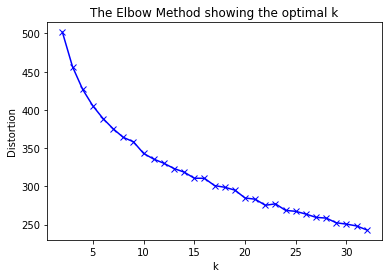

In [90]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

maximum = 32

_ = plt.plot()
distortions = []
K = range(2, maximum+1)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2018)
    _ = kmeans.fit(embedding)
    _ = distortions.append(kmeans.inertia_)

# Plot the elbow
_ = plt.plot(K, distortions, 'bx-')
_ = plt.xlabel('k')
_ = plt.ylabel('Distortion')
_ = plt.title('The Elbow Method showing the optimal k')
plt.show()

# K-mean

In [91]:
k = 7

In [92]:
np.array(embedding).shape

(450, 100)

In [93]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2018).fit(embedding)
clusters = kmeans.predict(embedding)

## Data Visualization

In [94]:
arr = np.array(embedding)
tsne = TSNE(n_components=2, random_state=512)
reduced = tsne.fit_transform(arr)       
t = np.array(reduced).transpose()

Text(-3.69398,-1.95609,'Peace')

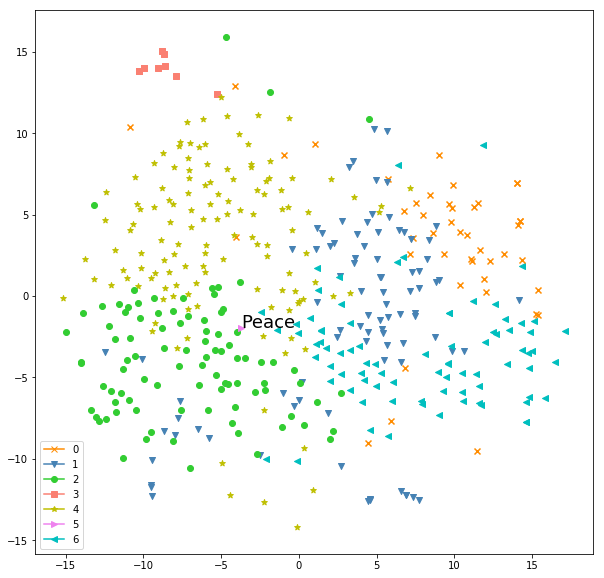

In [105]:
from matplotlib.lines import Line2D

markers = ["x", "v", "o", "s", "*", ">", "<", "P", 
           '1', '2', '3', '4', 'h', "d", "|", "+"]
colors = ['darkorange', 'steelblue', 'limegreen',  'salmon', 'y',  'violet', 'c', 'tomato', 
          'rosybrown', 'brown', 'darkmagenta', 'pink', 'gold', "orange", "skyblue", "seagreen"]

fig, ax = plt.subplots(figsize=(10, 10))

for x, y, c in zip(t[0], t[1], clusters):
    _ = ax.scatter(x, y, c=colors[c], marker=markers[c])

types = []
for c in set(clusters):
    types.append(Line2D([], [], color=colors[c], marker=markers[c], label=c))
    
for i, c in enumerate(clusters):
    if c == 5:
        ax.annotate(doc_txt[i], (t[0][i], t[1][i]), fontsize=18)

_ = plt.legend(handles=types, loc='lower left')
plt.show()

In [101]:
for i in range(len(clusters)):
    if clusters[i] == 2:
        print(doc_txt[i])

l want make sure Patel family knows I love like love Make sure kids world know Im executed kids Ive mentoring keep fight going Im good Warden
I want let everyone know I love much Ive hurt lot people lot people hurt I love much Life dont end goes forever Ive learn lessons life hard way One day wont need hurt people I love much Im ready go Ill back Nighty night everybody nighty night everybody Im done warden
Yes I made peace God I hope make peace
I would like thank everyone showed behalf Kathryn Cox I love dearly Thank Randy Cannon showing lifelong friend Thank Dr Steve Ball trying bring right There lot injustices happening This wrong Thank Reverend Leon Harrison showing grace God Thank friends This capital case I never intended anything I feel grieved loss Walker Donovan Marissa Walker I hope find peace productive society I would like thank friends row even though everything didnt work close isnt good enough I hope positive change come I would like thank father mother everything showed 